# Pytorch Test Youtube AutoGrad
Notebook for following along with the Pytorch autograd investigation, using [Pytorch](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html) website tutorial. This notebook will be similar to the previous Pytorch Test notebooks, as the [youtube content](https://www.youtube.com/watch?v=M0fX15_-xrY) covers similiar works.

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import numpy as np
import pandas as pd
import pickle as pk
import torch
import torchvision



print("Imports complete")

Imports complete


<br>

### Importing data sets
Importing the data for the models.

<b>Import sample data set and corresponding time/geo data</b>

In [2]:
#Importing data sets

print("Data sets successfully imported.")

Data sets successfully imported.


<br>

### Class Definitions
<b>Classes:</b><br>
<ul>
<li>
</ul>

In [3]:
#Class definition cell

print("Classes defined.")

Classes defined.


<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
<li>
</ul>

In [4]:
#Calculation functions cell


print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
<li> 
</ul>

In [5]:
#Plotting functions Cell


print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main code

#### A Simple Example

In [6]:
a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


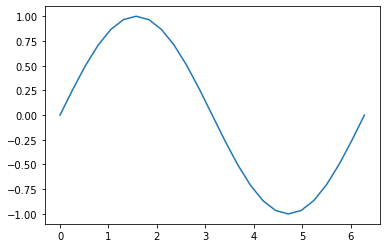

In [7]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [8]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [9]:
c = 2*b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Autograd expects a single element output. When `.backward()` on a tensor with no arguements is called, it expects the calling tensor to contain only a single element, as is the case when computing a loss function.

In [10]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [11]:
print("d:")
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print(f"\nc:{c.grad_fn}\n")
print(f"b:{b.grad_fn}\n")
print(f"a:{a.grad_fn}")

d:
((<MulBackward0 object at 0x000001B6FB253340>, 0), (None, 0))
((<SinBackward0 object at 0x000001B6FB1B85E0>, 0), (None, 0))
((<AccumulateGrad object at 0x000001B6FB2CC670>, 0),)
()

c:<MulBackward0 object at 0x000001B6FB2CC670>

b:<SinBackward0 object at 0x000001B6FB2E0610>

a:None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


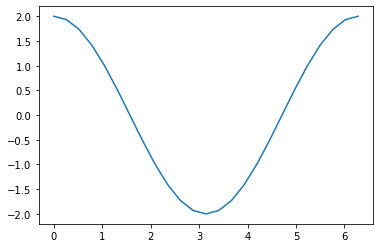

In [12]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

To get here a went through the `sin()` function, as well as `*2` and `+1`. This leaves an expected gradient (shown above) of `2*cos(a)`.

#### Autograd in Training
Resume [video](https://youtu.be/M0fX15_-xrY?t=318) here for autograd in training.

<br>